In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
#what types of questions can we use
#what types of questions would hyptohese testing let us ask 
#linear and logistic regression question 

In [3]:
df = pd.read_csv("../data/hollywood_highest_grossing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [5]:
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [6]:
df.sample()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
826,826,Peter Pan (1953),Wendy and her brothers are whisked away to the...,Walt Disney Studios Motion Pictures,NaN,87404651,87404651,87404651,"['Adventure', 'Animation', 'Family', 'Fantasy'...",1 hr 17 min,NaN


In [7]:
df['Genre'].value_counts()

Genre
['Action', 'Adventure', 'Sci-Fi']                       56
['Comedy']                                              35
['Comedy', 'Romance']                                   30
['Action', 'Adventure', 'Thriller']                     28
['Action', 'Crime', 'Thriller']                         23
                                                        ..
['Biography', 'Comedy', 'Drama', 'Romance']              1
['Drama', 'History']                                     1
['Drama', 'Family']                                      1
['Action', 'Crime', 'Mystery', 'Sci-Fi', 'Thriller']     1
['Comedy', 'Family', 'Fantasy', 'Romance']               1
Name: count, Length: 309, dtype: int64

In [8]:
df['Distributor'].value_counts()

Distributor
Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
DreamWorks                              21
New Line Cinema                         21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Columbia Pictures                        7
Dimension Films                          7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
United Artists                           2

In [9]:
df.head()    

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


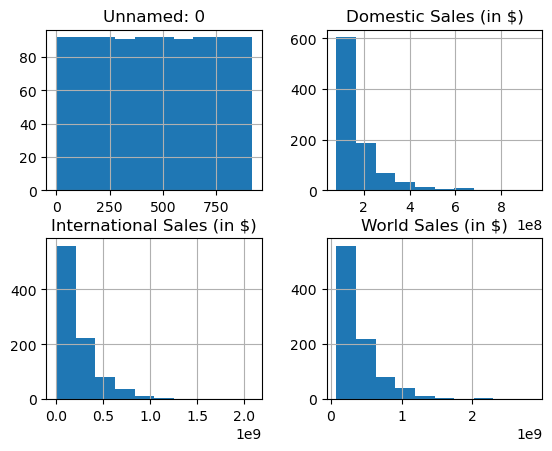

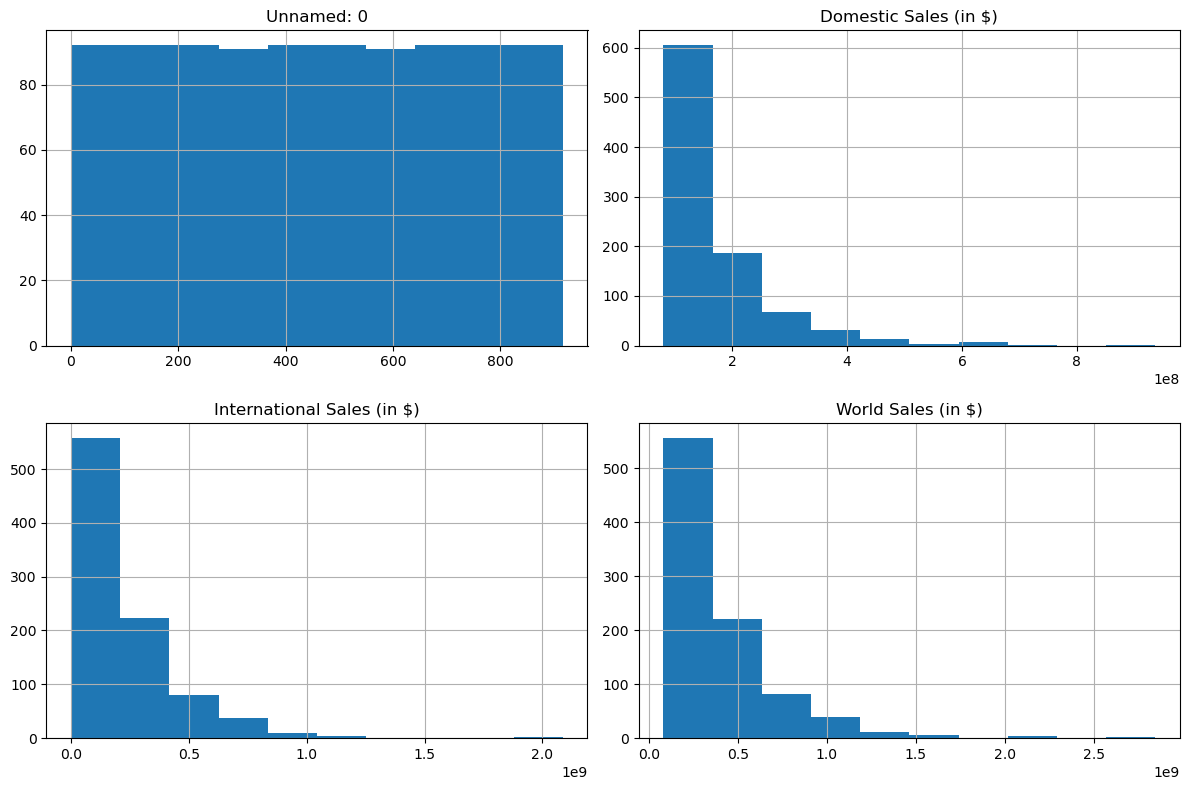

In [10]:
df.hist()
df.hist(figsize = (12, 8))
plt.tight_layout()

In [11]:
df.groupby('Distributor')['World Sales (in $)'].mean()

Distributor
20th Century Studios                   3.315038e+08
Artisan Entertainment                  2.486391e+08
Columbia Pictures                      1.963157e+08
Dimension Films                        1.747150e+08
DreamWorks                             4.958560e+08
DreamWorks Distribution                3.420376e+08
FilmDistrict                           1.660948e+08
Focus Features                         2.079614e+08
Fox Searchlight Pictures               2.793561e+08
IFC Films                              3.687440e+08
Lionsgate                              3.946582e+08
Metro-Goldwyn-Mayer (MGM)              3.098237e+08
Miramax                                2.287324e+08
New Line Cinema                        3.364927e+08
Newmarket Films                        6.120545e+08
Orion Pictures                         2.784991e+08
Paramount Pictures                     3.277124e+08
Relativity Media                       2.269040e+08
Revolution Studios                     1.803045e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [13]:
def convert_runtime(runtime):
    if pd.isna(runtime):
        return np.nan
    runtime = runtime.replace(' min', '').replace(' hr', '')
    parts = runtime.split()
    if len(parts) == 2:
        hours = int(parts[0])
        minutes = int(parts[1])
    elif len(parts) == 1:
        hours = 0
        minutes = int(parts[0])
    else:
        return np.nan
    return hours * 60 + minutes
# Apply the function to the 'Movie Runtime' column
df['Movie Runtime (in minutes)'] = df['Movie Runtime'].apply(convert_runtime)
df[['Title', 'Movie Runtime', 'Movie Runtime (in minutes)']].head()

,Title,Movie Runtime,Movie Runtime (in minutes)
0,Star Wars: Episode VII - The Force Awakens (2015),2 hr 18 min,138
1,Avengers: Endgame (2019),3 hr 1 min,181
2,Avatar (2009),2 hr 42 min,162
3,Black Panther (2018),2 hr 14 min,134
4,Avengers: Infinity War (2018),2 hr 29 min,149


In [14]:
df.sample(10)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime (in minutes)
229,229,Cars 2 (2011),Star race car Lightning McQueen and his pal Ma...,Walt Disney Studios Motion Pictures,"June 22, 2011",191452396,368400000,559852396,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 46 min,G,106
303,303,Quantum of Solace (2008),James Bond descends into mystery as he tries t...,Sony Pictures Entertainment (SPE),"October 31, 2008",168368427,421212055,589580482,"['Action', 'Adventure', 'Thriller']",1 hr 46 min,PG-13,106
762,762,Master and Commander: The Far Side of the Worl...,"During the Napoleonic Wars, a brash British ca...",Twentieth Century Fox,"November 14, 2003",93927920,117694615,211622535,"['Action', 'Adventure', 'Drama', 'War']",2 hr 18 min,PG-13,138
403,403,The Smurfs (2011),When the evil wizard Gargamel chases the tiny ...,Sony Pictures Entertainment (SPE),"July 27, 2011",142614158,421135165,563749323,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 43 min,PG,103
174,174,Ghost (1990),"After a young man is murdered, his spirit stay...",Paramount Pictures,"July 13, 1990",217631306,288072251,505703557,"['Drama', 'Fantasy', 'Romance', 'Thriller']",2 hr 7 min,NaN,127
440,440,Patch Adams (1998),"The true story of a heroic man, Hunter ""Patch""...",Universal Pictures,"December 25, 1998",135026902,67266000,202292902,"['Biography', 'Comedy', 'Drama', 'Romance']",1 hr 55 min,PG-13,115
459,459,Silver Linings Playbook (2012),"After a stint in a mental institution, former ...",The Weinstein Company,"November 16, 2012",132092958,104319495,236412453,"['Comedy', 'Drama', 'Romance']",2 hr 2 min,R,122
873,873,Immortals (2011),Theseus is a mortal man chosen by Zeus to lead...,Relativity Media,"November 10, 2011",83504017,143400000,226904017,"['Action', 'Drama', 'Fantasy', 'Romance']",1 hr 50 min,R,110
639,639,Analyze This (1999),A comedy about a psychiatrist whose number one...,Warner Bros.,"March 5, 1999",106885658,70000000,176885658,"['Comedy', 'Crime']",1 hr 43 min,R,103
336,336,A Quiet Place Part II (2020),"Following the events at home, the Abbott famil...",Paramount Pictures,NaN,160072261,137300000,297372261,"['Drama', 'Horror', 'Sci-Fi', 'Thriller']",1 hr 37 min,NaN,97


### Hypothesis Test

Null Hypothesis (H0): There is no significant difference in the sales of action movies compared to the global sales of non-action movies.

Alternate Hypothesis (H1): There is a significant difference in the sales of Action movies compared to the global sales of non-action movies.

In [15]:
non_action_movies = df[~df['Genre'].str.contains('Action')]

In [16]:
non_action_movies

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime (in minutes)
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,194
11,11,The Lion King (2019),"After the murder of his father, a young lion p...",Walt Disney Studios Motion Pictures,"July 11, 2019",543638043,1119261396,1662899439,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 58 min,PG,118
15,15,Beauty and the Beast (2017),A selfish Prince is cursed to become a monster...,Walt Disney Studios Motion Pictures,"March 16, 2017",504481165,769095055,1273576220,"['Adventure', 'Family', 'Fantasy', 'Musical', ...",2 hr 9 min,PG,129
16,16,Finding Dory (2016),Friendly but forgetful blue tang Dory begins a...,Walt Disney Studios Motion Pictures,NaN,486295561,542275381,1028570942,"['Adventure', 'Animation', 'Comedy', 'Family']",1 hr 37 min,NaN,97
17,17,Frozen II (2019),"Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",Walt Disney Studios Motion Pictures,"November 20, 2019",477373578,972653355,1450026933,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 43 min,PG,103
...,...,...,...,...,...,...,...,...,...,...,...,...
911,911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG,103
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13,123
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13,133
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R,98


In [17]:
# Filter rows that have 'Action' in the 'Genre' column
action_movies = df[df['Genre'].apply(lambda genres: 'Action' in genres)]
action_movies

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime (in minutes)
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,138
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,181
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,162
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,134
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,149
...,...,...,...,...,...,...,...,...,...,...,...,...
901,901,Maze Runner: The Scorch Trials (2015),"After having escaped the Maze, the Gladers now...",Twentieth Century Fox,"September 9, 2015",81697192,230598864,312296056,"['Action', 'Adventure', 'Sci-Fi', 'Thriller']",2 hr 11 min,PG-13,131
904,904,Unstoppable (2010),"With an unmanned, half-mile-long freight train...",Twentieth Century Fox,"November 10, 2010",81562942,86242524,167805466,"['Action', 'Thriller']",1 hr 38 min,PG-13,98
905,905,Payback (1999),"After a successful heist, Porter is left for d...",Paramount Pictures,"February 5, 1999",81526121,80100000,161626121,"['Action', 'Crime', 'Drama', 'Thriller']",1 hr 40 min,R,100
912,912,Congo (1995),When an expedition to the African Congo ends i...,Paramount Pictures,NaN,81022101,71000000,152022101,"['Action', 'Adventure', 'Mystery', 'Sci-Fi']",1 hr 49 min,NaN,109


In [18]:
action_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 396 entries, 0 to 914
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  396 non-null    int64 
 1   Title                       396 non-null    object
 2   Movie Info                  396 non-null    object
 3   Distributor                 396 non-null    object
 4   Release Date                359 non-null    object
 5   Domestic Sales (in $)       396 non-null    int64 
 6   International Sales (in $)  396 non-null    int64 
 7   World Sales (in $)          396 non-null    int64 
 8   Genre                       396 non-null    object
 9   Movie Runtime               396 non-null    object
 10  License                     343 non-null    object
 11  Movie Runtime (in minutes)  396 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 40.2+ KB


In [19]:
# t tests let's us look at the randomness of the dataset
t_stat, p_value = ttest_ind(action_movies['World Sales (in $)'], non_action_movies['World Sales (in $)'], equal_var = False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.614217017226149
P-value: 3.7734424498320856e-11


#### Using Hypothesis testing, we can reject our null hypothesis.  There is a signficant difference in world sales of action movies vs. movies with no action.  (Action Movies make more).

# Lets use Linear Regression Analysis to gather multiple features(X) and a target(y).

H0: There is no significant difference in sales of run times of action movies.
H1: There is a significant difference in sales of run tinmes of action movies.

In [20]:
X = action_movies['Movie Runtime (in minutes)']
y = action_movies['World Sales (in $)']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train)
y_pred = model.predict(X_test.values.reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)


In [22]:
model

LinearRegression()

In [23]:
model.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [24]:
y_pred

array([ 6.81462665e+08,  4.28016412e+08,  4.08138274e+08,  7.01340803e+08,
        5.12498496e+08,  5.32376634e+08,  5.22437565e+08,  4.47894549e+08,
        3.68381999e+08,  4.77711755e+08,  4.47894549e+08, -1.28571440e+08,
        4.47894549e+08,  4.47894549e+08,  3.88260137e+08,  4.03168740e+08,
        6.26797787e+08,  4.03168740e+08,  4.32985946e+08,  4.23046877e+08,
        5.62193840e+08,  3.48503861e+08,  3.83290602e+08,  5.47285237e+08,
        5.27407099e+08,  5.07528962e+08,  4.32985946e+08,  4.92620359e+08,
        4.47894549e+08,  3.48503861e+08,  3.78321068e+08,  5.62193840e+08,
        5.17468031e+08,  3.18686655e+08,  3.18686655e+08,  4.92620359e+08,
        4.77711755e+08,  5.82071978e+08,  4.92620359e+08,  4.62803152e+08,
        3.58442930e+08,  4.32985946e+08,  5.37346168e+08,  4.32985946e+08,
        4.52864084e+08,  3.08747586e+08,  4.52864084e+08,  3.68381999e+08,
        3.43534327e+08,  5.12498496e+08,  4.72742221e+08,  5.12498496e+08,
        5.37346168e+08,  

In [25]:
mse

1.244344333627627e+17

In [26]:
residuals = y_pred - y_test

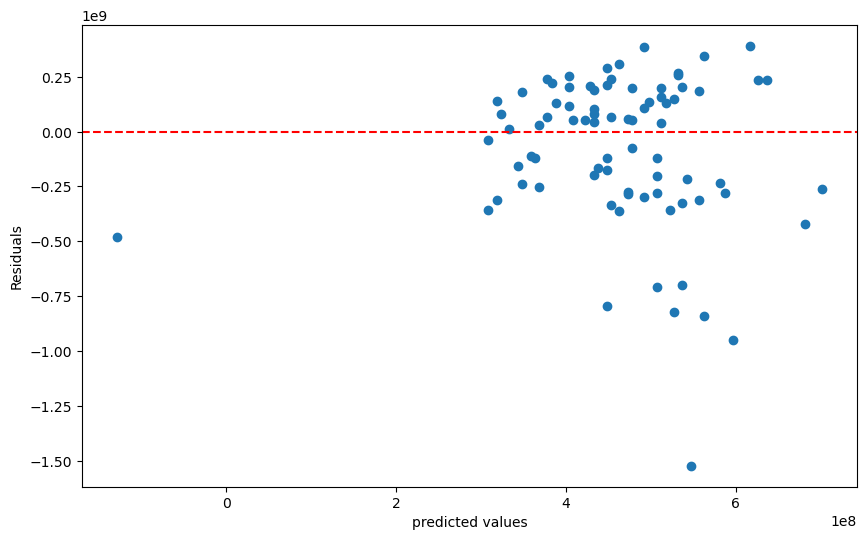

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle="--")
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()

In [28]:
# Now we move on to the predict and look at global sales
X = df['Movie Runtime (in minutes)']
y = df['World Sales (in $)']
# Below is asking if a movie is 130 minutes long, how much money will it make
# This requires double square brackets because the predict method expects a 2D array
model.predict([[130]])
# Convert the predicted value to non-scientific notation
runtime_list = [130, 150, 180, 200, 210]
predicted_value = model.predict([[30]])[0]
predicted_value_non_scientific = "{:.2f}".format(predicted_value)
predicted_value_non_scientific

'10575523.09'

Logistic Relation  
Was movie classified as action or comedy (as action/comedy or not comedy/action).  Predict genre based off sales or runtime.  Zeros and Ones.

In [29]:
# This created a new column called 'Action_log' that is 1 if the movie is an action movie and 0 if it is not
# action movie = 1
# non-action movie = 0
df['Action_log'] = df['Genre'].apply(lambda genres: 1 if 'Action' in genres else 0)
df.sample(5)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie Runtime (in minutes),Action_log
164,164,Shang-Chi and the Legend of the Ten Rings (2021),"Shang-Chi, the master of weaponry-based Kung F...",Walt Disney Studios Motion Pictures,NaN,224543292,207689718,432233010,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 12 min,NaN,132,1
799,799,Madea Goes to Jail (2009),"Mischievous grandma Madea lands in jail, where...",Lionsgate,NaN,90508336,90508336,90508336,"['Comedy', 'Crime', 'Drama']",1 hr 43 min,NaN,103,0
49,49,Despicable Me 2 (2013),"When Gru, the world's most super-bad turned su...",Universal Pictures,"June 20, 2013",368065385,602700620,970766005,"['Adventure', 'Animation', 'Comedy', 'Crime', ...",1 hr 38 min,PG,98,0
818,818,The Muppets (2011),A Muppet fanatic with some help from his 2 hum...,Walt Disney Studios Motion Pictures,"November 23, 2011",88631237,76553000,165184237,"['Adventure', 'Comedy', 'Family', 'Musical']",2 hr,PG,2,0
641,641,Miss Congeniality (2000),An F.B.I. Agent must go undercover in the Miss...,Warner Bros.,"December 22, 2000",106807667,105935053,212742720,"['Action', 'Comedy', 'Crime', 'Romance']",1 hr 49 min,PG-13,109,1


In [30]:
# create the log regression model
log_model = LogisticRegression()
log_model

LogisticRegression()

In [31]:
# Now we move on to the logistic regression
X = df[['World Sales (in $)', 'Movie Runtime (in minutes)']]
y = df['Action_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
# y = f(x)
y_pred = log_model.predict(X_train)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [33]:
# Need to convert the predicted values to probabilities
y_pred_proba = log_model.predict_proba(X_train)
y_pred_proba
# add a threshold to the model
# threshold = 0.5
# y_pred = (y_pred_proba[:,1] > threshold).astype(int)
# y_pred_proba_threshold = log_model.predict_proba(X_train)
# y_pred_proba_threshold

array([[0.56910552, 0.43089448],
       [0.33674908, 0.66325092],
       [0.46202677, 0.53797323],
       ...,
       [0.58299339, 0.41700661],
       [0.59009428, 0.40990572],
       [0.5057554 , 0.4942446 ]])

In [42]:
y_pred_proba_true = y_pred_proba[:,1]
y_pred_proba_true

array([0.43089448, 0.66325092, 0.53797323, 0.70112946, 0.39094523,
       0.36312505, 0.47912995, 0.41707553, 0.34001894, 0.45154204,
       0.51497651, 0.47063403, 0.70621301, 0.61870991, 0.47171041,
       0.42754957, 0.40260775, 0.38733778, 0.50046441, 0.37677036,
       0.49100199, 0.43546568, 0.3641527 , 0.35977871, 0.5716668 ,
       0.39610716, 0.53356151, 0.41956969, 0.45994806, 0.40731805,
       0.37000883, 0.44147725, 0.43153262, 0.34881489, 0.35831659,
       0.3760303 , 0.44388145, 0.55162745, 0.4632071 , 0.41554404,
       0.38972033, 0.48647922, 0.41663667, 0.40279706, 0.79501123,
       0.37672614, 0.69372509, 0.41324213, 0.44543411, 0.5447438 ,
       0.47133042, 0.4674076 , 0.47001193, 0.49022998, 0.44178803,
       0.47633133, 0.39745777, 0.32462818, 0.52906829, 0.93145392,
       0.43073739, 0.38333737, 0.4330376 , 0.43667303, 0.46816435,
       0.38906687, 0.41881814, 0.39824446, 0.42405063, 0.41528927,
       0.38668438, 0.4258935 , 0.45424044, 0.35729841, 0.47152

c:\Users\jerem\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


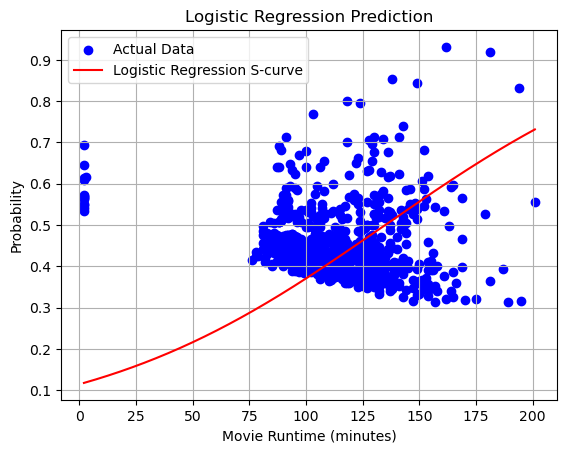

In [44]:
# Standardize the runtime feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
# Logistic function to transform linear predictions to probabilities
def logistic_function(x):
    return 1 / (1 + np.exp(-x))
# Generate values for runtime to plot the S-curve
runtime_values = np.linspace(X['Movie Runtime (in minutes)'].min(), X['Movie Runtime (in minutes)'].max(), 300)
runtime_values_scaled = scaler.transform(np.column_stack([np.full_like(runtime_values, X['World Sales (in $)'].mean()), runtime_values]))
logits = log_model.coef_[0][1] * runtime_values_scaled[:, 1] + log_model.intercept_[0]
probabilities = logistic_function(logits)
# Create a scatter plot of the actual data
plt.scatter(X_train['Movie Runtime (in minutes)'], y_pred_proba_true, color='blue', label='Actual Data')
# Plot the logistic regression S-curve
plt.plot(runtime_values, probabilities, color='red', label='Logistic Regression S-curve')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Probability')
plt.title('Logistic Regression Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)



array([[346,  77],
       [223,  88]], dtype=int64)

In [36]:
# let's look at the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)


0.5912806539509536

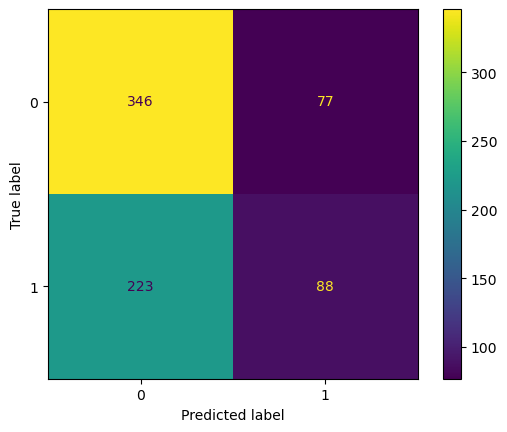

In [37]:
# let's visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()

